In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#mat = pd.read_csv("data/student-mat.csv")
mat = pd.read_csv("data/student-mat.csv")

# Variables
    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - 1 hour)
    studytime - weekly study time (numeric: 1 - 10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)


In [3]:
mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Most of the variables are integer and 17 categorical data which is more than enough for EDA.

In [5]:
mat.head().transpose()
# We used transpose to list all columns

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [4]:

#Lets rename the G3 column to Final_grade.
mat = mat.rename(columns={'G3':'Final_grade'})
mat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Good summary of important variables such as Final_grade, Medu,Fedu and many more.

In [7]:
# Make sure there is not any na in dataset.
mat.isna().sum()/mat.shape[0]

school         0.0
sex            0.0
age            0.0
address        0.0
famsize        0.0
Pstatus        0.0
Medu           0.0
Fedu           0.0
Mjob           0.0
Fjob           0.0
reason         0.0
guardian       0.0
traveltime     0.0
studytime      0.0
failures       0.0
schoolsup      0.0
famsup         0.0
paid           0.0
activities     0.0
nursery        0.0
higher         0.0
internet       0.0
romantic       0.0
famrel         0.0
freetime       0.0
goout          0.0
Dalc           0.0
Walc           0.0
health         0.0
absences       0.0
G1             0.0
G2             0.0
Final_grade    0.0
dtype: float64

In [12]:
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'Final_grade']
levCols = []
numCols = []
for col in features:
    if mat[col].dtype==object:
        levCols.append(col)
    else:
        numCols.append(col)

(array([2., 1., 2., 1., 2., 1., 2., 1., 2., 2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

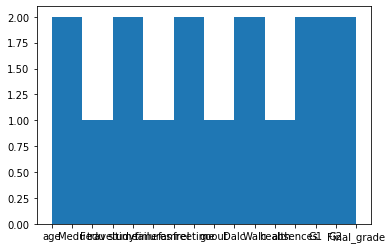

In [13]:
plt.hist(numCols)

In [17]:
pear

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_grade
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [18]:
corrmat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_grade
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


In [15]:
pear = mat[numCols].corr()

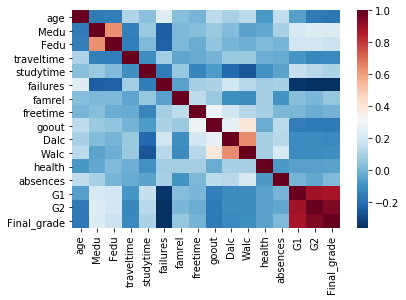

In [14]:
corrmat = mat[numCols].corr('spearman')
sns.heatmap(corrmat,cmap="RdBu_r")
mat.corr

There are lots of columns so lets create a subset of data based on heatmap and our preferences. 

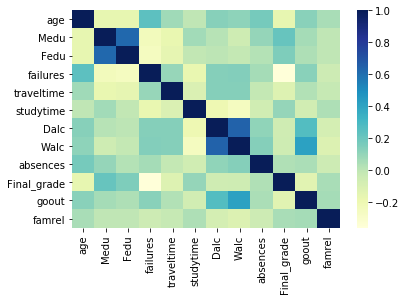

In [9]:
columns = ["age","Medu","Fedu","failures","traveltime","studytime","Dalc","Walc","absences","Final_grade","goout","famrel"]
subset = mat[columns]
s_corr = subset.corr()
sns.heatmap(s_corr,cmap="RdBu_r")

<Figure size 432x288 with 0 Axes>

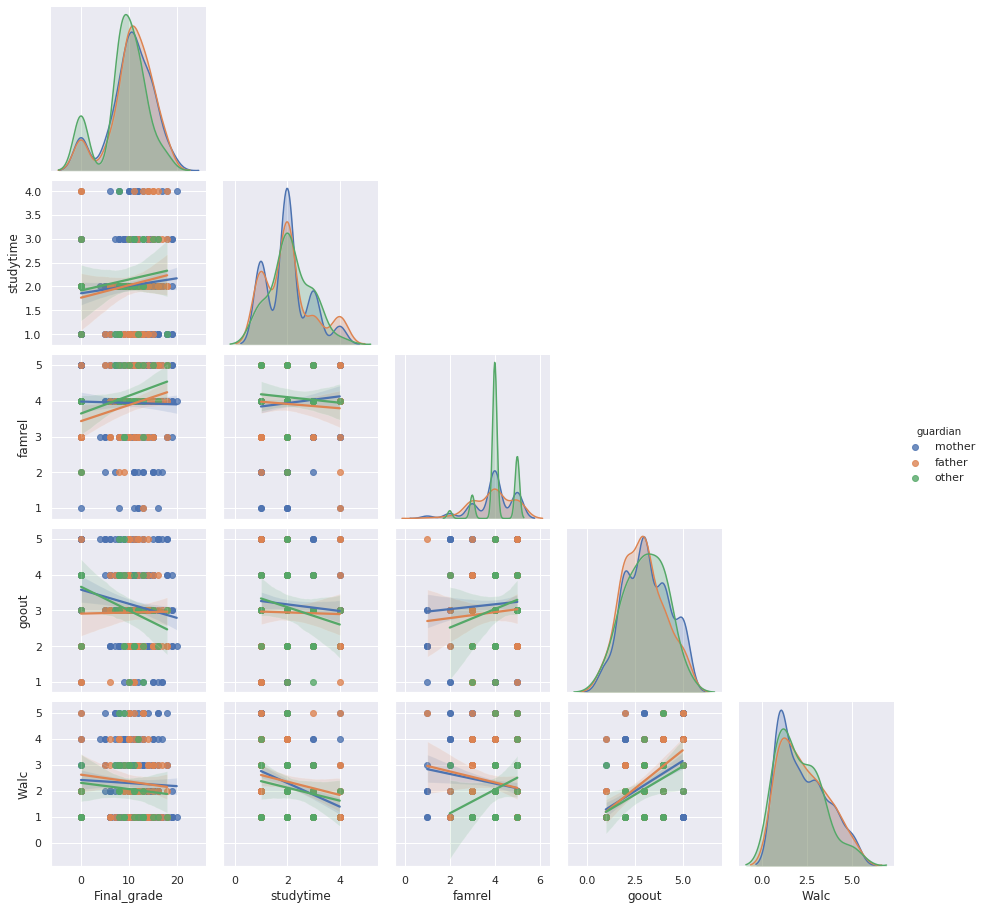

<Figure size 432x288 with 0 Axes>

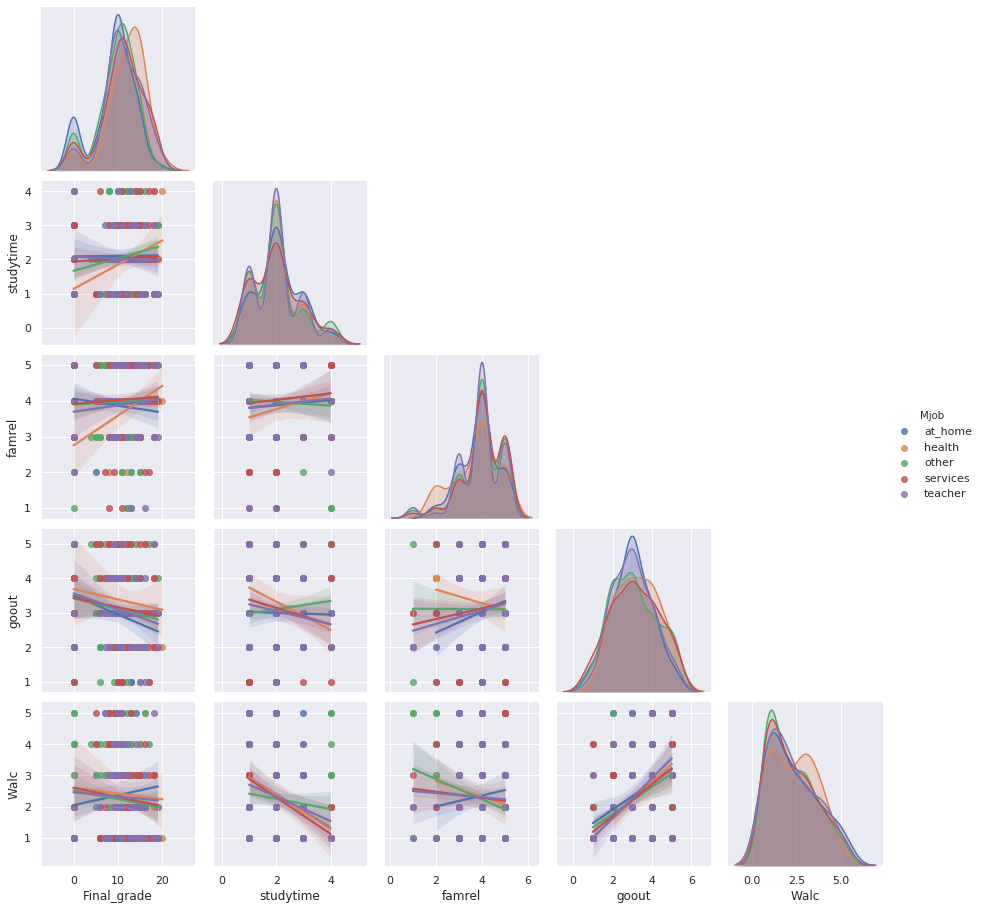

<Figure size 432x288 with 0 Axes>

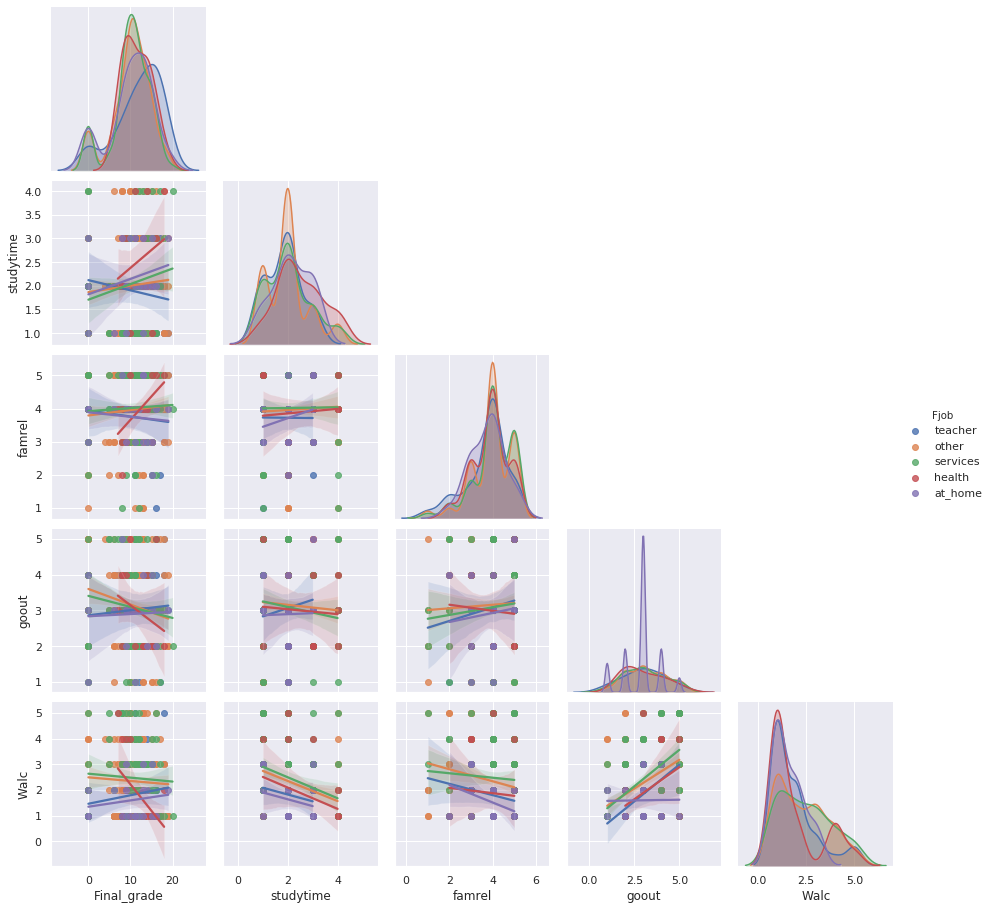

<Figure size 432x288 with 0 Axes>

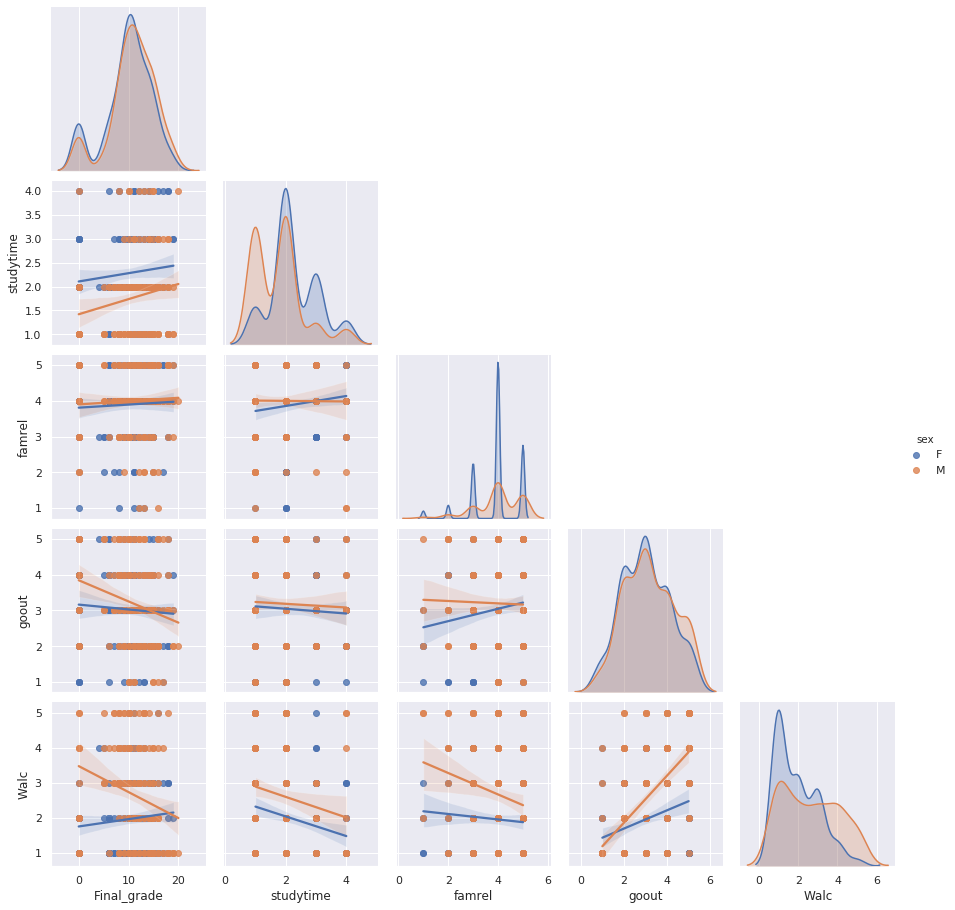

In [10]:
cat_col = ['guardian','Mjob','Fjob','sex']
for col in cat_col :
    sns.set()
    cols = ["Final_grade","studytime","famrel","goout","Walc"]
    plt.figure()
    sns.pairplot(mat[cols + [col]],hue = col,kind= 'reg',corner=True)
    plt.show()

There some interesting infos we can gather from first pairplot
- We can see there is a relationship between studytime and final grade especially if student's guard is different than mother or father.
- when we look at famrel histogram which has interesting value for other, according to it if student's guard is other their relationship is better.
- Lastly we might guess the more students go out the more they consume alchol.
- oddly if student's mother working in healt industry s/he study more, same apply for father as well plus the relationship between student is always better than others.
- as it can seen from last plot, alchol consumption among males student is higher than female.


Text(0.5, 1.0, 'Gender and being romantic affect on Final grade ')

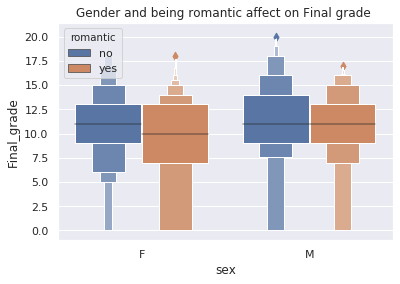

In [12]:
sns.boxenplot(x="sex",y= "Final_grade",data=mat,hue="romantic").set_title("Gender and being romantic affect on Final grade ")

Text(0.5, 1.0, 'Effect of parent status to final grade based on age')

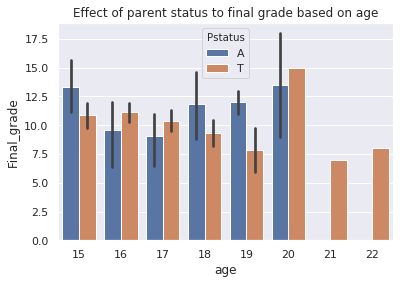

In [13]:
sns.barplot(x = 'age',y = 'Final_grade',hue="Pstatus",data=mat).set_title("Effect of parent status to final grade based on age")

In [23]:
subset.columns

Index(['age', 'Medu', 'Fedu', 'failures', 'traveltime', 'studytime', 'Dalc',
       'Walc', 'absences', 'Final_grade', 'goout', 'famrel'],
      dtype='object')

In [24]:
to_model = mat[['age', 'Medu', 'Fedu', 'failures', 'traveltime', 'studytime', 'Dalc',
       'Walc', 'absences', 'Final_grade', 'goout', 'famrel'] + ['guardian','Mjob','Fjob','sex', 'Pstatus', 'romantic']]
to_model.to_csv('data/to_model.csv')

In [25]:
to_model.head()

,age,Medu,Fedu,failures,traveltime,studytime,Dalc,Walc,absences,Final_grade,goout,famrel,guardian,Mjob,Fjob,sex,Pstatus,romantic
0,18,4,4,0,2,2,1,1,6,6,4,4,mother,at_home,teacher,F,A,no
1,17,1,1,0,1,2,1,1,4,6,3,5,father,at_home,other,F,T,no
2,15,1,1,3,1,2,2,3,10,10,2,4,mother,at_home,other,F,T,no
3,15,4,2,0,1,3,1,1,2,15,2,3,mother,health,services,F,T,yes
4,16,3,3,0,1,2,1,2,4,10,2,4,father,other,other,F,T,no


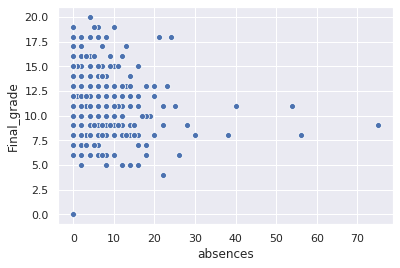

In [28]:
sns.scatterplot(x = 'absences', y = 'Final_grade', data = to_model[['absences', 'Final_grade']])